In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno

### all_africa_southsudan.csv

In [9]:
df = pd.read_csv("data/all_africa_southsudan.csv")
df.head()

,title,date,paragraphs,publisher
0,South Sudan: A Former Child Soldier Fights to ...,2021-02-12,"Sara, who was abducted at age 12, spent two ye...",Thomson Reuters Foundation (London)
1,South Sudan: #budget2019 - Will It Lead to Mor...,2019-02-21,Legal claims against the department now amount...,Bhekisisa (Johannesburg)
2,South Sudan: Retired NBA Star Elected Basketba...,2019-11-25,Former NBA star Luol Ajou Deng has been electe...,The East African (Nairobi)
3,"South Sudan - Political Violence On the Rise, ...",2022-02-11,UN human rights experts have warned of increas...,UN News Service
4,South Sudan: S. Sudan Receives First Astrazene...,2021-03-25,"Juba — South Sudan on Thursday received 132,00...",The East African (Nairobi)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18226 entries, 0 to 18225
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       18226 non-null  object
 1   date        18226 non-null  object
 2   paragraphs  18226 non-null  object
 3   publisher   18226 non-null  object
dtypes: object(4)
memory usage: 569.7+ KB


In [11]:
df.describe(include='all')

,title,date,paragraphs,publisher
count,18226,18226,18226,18226
unique,18226,3395,18191,274
top,South Sudan: A Former Child Soldier Fights to ...,2013-12-18,Juba — South Sudan President Salva Kiir has re...,Sudan Tribune
freq,1,53,2,4712


#### Missing values

In [12]:
df.isnull().sum()

title         0
date          0
paragraphs    0
publisher     0
dtype: int64

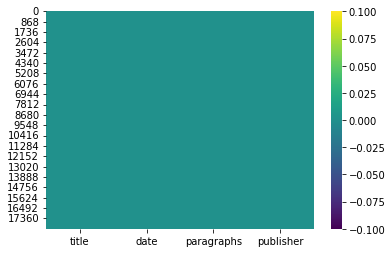

In [13]:
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

#### Over time

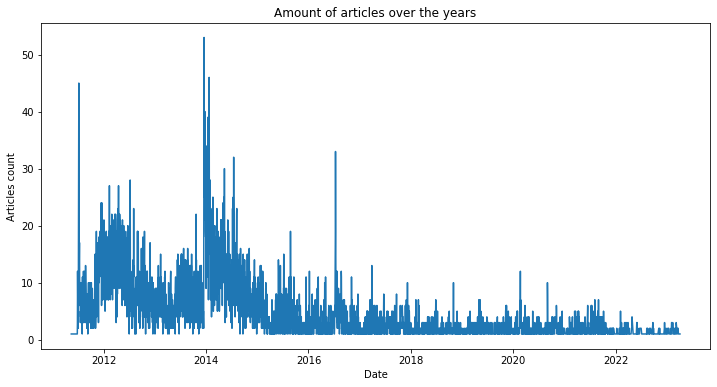

In [17]:
df['date'] = pd.to_datetime(df['date']).dt.date
daily_counts = df['date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(daily_counts.index, daily_counts.values)
plt.title('Amount of articles over the years')
plt.xlabel('Date')
plt.ylabel('Articles count')
plt.show()

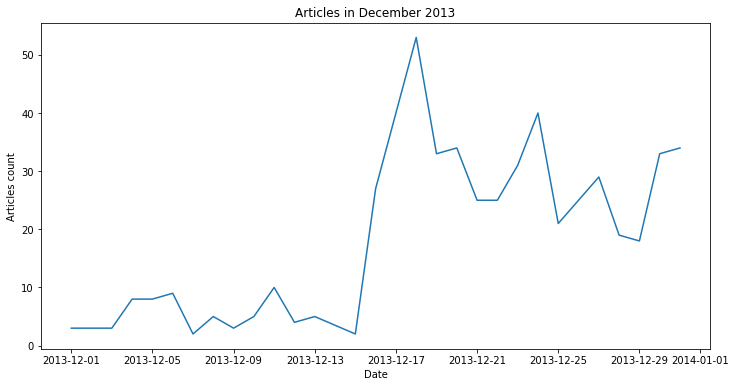

In [19]:
# Exploring for around 2013-12-18
start_date = pd.to_datetime('2013-12-01').date()
end_date = pd.to_datetime('2013-12-31').date()
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
daily_counts = filtered_df['date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values)
plt.title('Articles in December 2013')
plt.xlabel('Date')
plt.ylabel('Articles count')
plt.show()

research events with more articles -> get to know SS better, what are the disproportions there

Bias with regard to ethnicity groups in SS
Who is alocating food help resources?
Are there groups with are in more favor of the government? (which is probably responsible for allocating resources)

#### Publisher

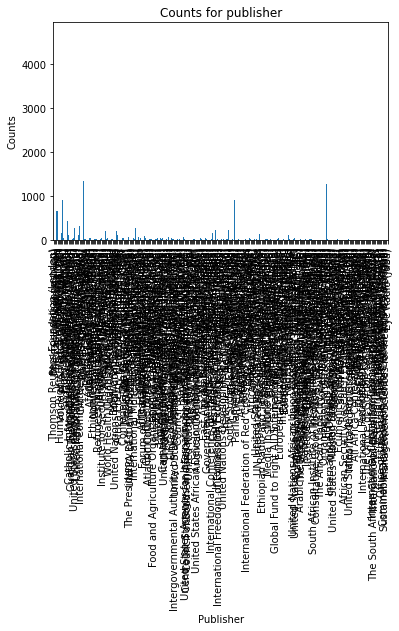

In [20]:
df_grouped_by_publisher = df.groupby(pd.Grouper(key='publisher')).size()

df_grouped_by_publisher.plot.bar()
plt.title('Counts for publisher')
plt.xlabel('Publisher')
plt.ylabel('Counts')
plt.show()

In [29]:
print(df_grouped_by_publisher.sort_values(ascending=False).head(15))

publisher
Sudan Tribune                                         4712
South Sudan News Agency                               1331
The Citizen (Juba)                                    1271
Voice of America (Washington, DC)                      914
Government of South Sudan (Juba)                       905
The East African (Nairobi)                             653
UN News Service                                        648
Sudan News Agency (Khartoum)                           428
The Nation (Nairobi)                                   360
Deutsche Welle (Bonn)                                  325
The Monitor (Kampala)                                  320
Dabanga (Amsterdam)                                    278
PR Newswire (New York)                                 270
United States Department of State (Washington, DC)     264
Government of Ethiopia (Addis Ababa)                   218
dtype: int64


Research publishers

#### Articles about food, etc.

In [40]:
target_word = 'food'
mask = df['paragraphs'].str.contains(target_word)
filtered_df = df[mask]
print(filtered_df.count())

title         3281
date          3281
paragraphs    3281
publisher     3281
dtype: int64


In [39]:
target_word = 'starve'
mask = df['paragraphs'].str.contains(target_word)
filtered_df = df[mask]
print(filtered_df.count())

title         107
date          107
paragraphs    107
publisher     107
dtype: int64


In [38]:
target_word = 'famine'
mask = df['paragraphs'].str.contains(target_word)
filtered_df = df[mask]
print(filtered_df.count())

title         770
date          770
paragraphs    770
publisher     770
dtype: int64


Which publishers mention those topics? Are they a reliable sources?
Bigger weight on articles with key words, define more keywords?

### articles_summary_cleaned.csv

In [41]:
df = pd.read_csv("data/articles_summary_cleaned.csv")
df.head()

,summary,date,location_article,lat,lng
0,The article discusses the passing of the new C...,2011-07-07,Juba,4.859363,31.571250
1,The article discusses the military actions tak...,2011-07-03,Abyei,9.838551,28.486396
2,The article discusses the signing of a Framewo...,2011-06-30,Southern Kordofan,11.036544,30.895824
3,The article discusses the upcoming independenc...,2011-07-04,South Sudan,6.876992,31.306979
4,The article discusses the need for South Sudan...,2011-07-02,Juba,4.859363,31.571250


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18520 entries, 0 to 18519
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   summary           18520 non-null  object 
 1   date              18520 non-null  object 
 2   location_article  18520 non-null  object 
 3   lat               18520 non-null  float64
 4   lng               18520 non-null  float64
dtypes: float64(2), object(3)
memory usage: 723.6+ KB


In [43]:
df.describe(include='all')

,summary,date,location_article,lat,lng
count,18520,18520,18520,18520.000000,18520.000000
unique,18520,3399,1893,NaN,NaN
top,The article discusses the passing of the new C...,2013-12-18,Juba,NaN,NaN
freq,1,51,6310,NaN,NaN
mean,NaN,NaN,NaN,8.874658,28.556556
std,NaN,NaN,NaN,10.606173,24.525049
min,NaN,NaN,NaN,-37.988580,-175.198242
25%,NaN,NaN,NaN,4.859363,31.306979
50%,NaN,NaN,NaN,6.800169,31.571250
75%,NaN,NaN,NaN,9.231487,32.559899


In [44]:
df.isnull().sum()

summary             0
date                0
location_article    0
lat                 0
lng                 0
dtype: int64

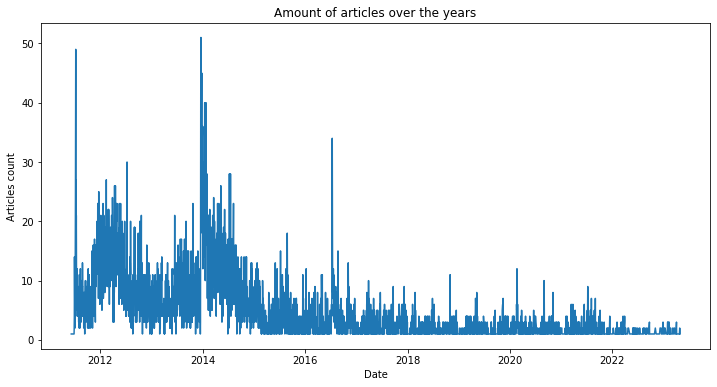

In [45]:
df['date'] = pd.to_datetime(df['date']).dt.date
daily_counts = df['date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(daily_counts.index, daily_counts.values)
plt.title('Amount of articles over the years')
plt.xlabel('Date')
plt.ylabel('Articles count')
plt.show()

#### Location

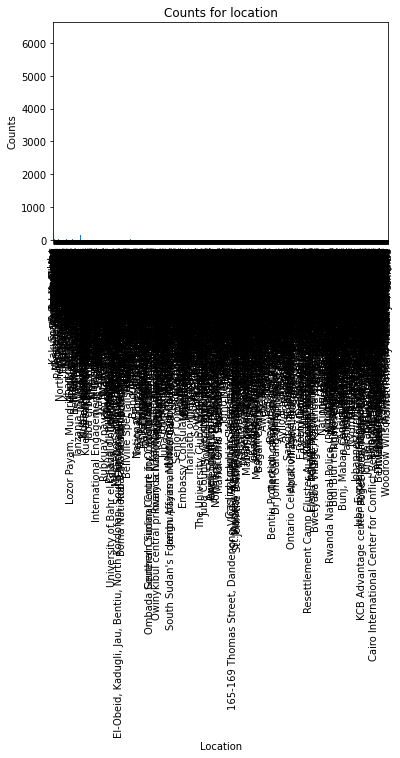

In [46]:
df_grouped_by_loc = df.groupby(pd.Grouper(key='location_article')).size()

df_grouped_by_loc.plot.bar()
plt.title('Counts for location')
plt.xlabel('Location')
plt.ylabel('Counts')
plt.show()

In [47]:
print(df_grouped_by_loc.sort_values(ascending=False).head(15))

location_article
Juba             6310
South Sudan      1203
Khartoum         1146
Addis Ababa       983
Nairobi           340
Bentiu            337
Abyei             298
Bor               297
Jonglei state     259
Malakal           236
Kampala           222
Jonglei           216
Wau               172
Jonglei State     157
Rumbek            146
dtype: int64


### food_crises_cleaned.csv

In [48]:
df = pd.read_csv("data/food_crises_cleaned.csv")
df.head()

,country,district_code,district,centx,centy,year_month,year,month,ipc,ha,...,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct,date
0,South Sudan,74,Bor,32.00486,6.465644,2007_01,2007,1,NaN,NaN,...,0.048880,0,0,0.561363,14008.33,7.961984,239344.0,11393.76,90.8503,2007-01-01
1,South Sudan,74,Bor,32.00486,6.465644,2007_02,2007,2,NaN,NaN,...,-0.457928,0,0,0.565693,14008.33,7.961984,239344.0,11393.76,90.8503,2007-02-01
2,South Sudan,74,Bor,32.00486,6.465644,2007_03,2007,3,NaN,NaN,...,-0.590175,0,0,0.592437,14008.33,7.961984,239344.0,11393.76,90.8503,2007-03-01
3,South Sudan,74,Bor,32.00486,6.465644,2007_04,2007,4,NaN,NaN,...,-1.845536,0,0,0.605352,14008.33,7.961984,239344.0,11393.76,90.8503,2007-04-01
4,South Sudan,74,Bor,32.00486,6.465644,2007_05,2007,5,NaN,NaN,...,-2.972735,0,0,0.618699,14008.33,7.961984,239344.0,11393.76,90.8503,2007-05-01


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12324 entries, 0 to 12323
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          12324 non-null  object 
 1   district_code    12324 non-null  int64  
 2   district         12324 non-null  object 
 3   centx            12324 non-null  float64
 4   centy            12324 non-null  float64
 5   year_month       12324 non-null  object 
 6   year             12324 non-null  int64  
 7   month            12324 non-null  int64  
 8   ipc              3042 non-null   float64
 9   ha               2184 non-null   float64
 10  ndvi_mean        12324 non-null  float64
 11  ndvi_anom        12324 non-null  float64
 12  rain_mean        12324 non-null  float64
 13  rain_anom        12324 non-null  float64
 14  et_mean          12324 non-null  float64
 15  et_anom          12324 non-null  float64
 16  count_violence   12324 non-null  int64  
 17  sum_fataliti

In [50]:
df.describe(include='all')

,country,district_code,district,centx,centy,year_month,year,month,ipc,ha,...,et_anom,count_violence,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct,date
count,12324,12324.000000,12324,12324.000000,12324.000000,12324,12324.000000,12324.000000,3042.000000,2184.000000,...,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324.000000,12324
unique,1,NaN,78,NaN,NaN,158,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158
top,South Sudan,NaN,Bor,NaN,NaN,2007_01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01
freq,12324,NaN,158,NaN,NaN,78,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78
mean,NaN,112.500000,NaN,30.552041,7.325735,NaN,2013.088608,6.436709,2.124918,0.125458,...,1.098669,0.543492,3.220789,13.890655,8109.035212,18.570146,147039.099666,33427.480308,80.555837,NaN
std,NaN,22.515723,NaN,2.063909,1.927968,NaN,3.799521,3.475977,0.896948,0.331313,...,3.419724,1.805653,37.882633,22.856678,8116.418198,14.369645,101589.906878,51714.447306,10.765849,NaN
min,NaN,74.000000,NaN,25.589390,3.737241,NaN,2007.000000,1.000000,1.000000,0.000000,...,-12.117810,0.000000,0.000000,0.459595,757.785500,0.032678,11352.160000,2787.772000,58.213330,NaN
25%,NaN,93.000000,NaN,29.130190,5.460567,NaN,2010.000000,3.000000,1.000000,0.000000,...,-0.632700,0.000000,0.000000,1.032964,4419.444000,6.354869,75670.000000,8429.583000,71.411760,NaN
50%,NaN,112.500000,NaN,30.584770,7.558543,NaN,2013.000000,6.000000,2.000000,0.000000,...,0.329042,0.000000,0.000000,2.108440,5881.470500,16.874360,123093.000000,15014.300000,85.683480,NaN
75%,NaN,132.000000,NaN,32.210300,8.930423,NaN,2016.000000,9.000000,3.000000,0.000000,...,3.122106,0.000000,0.000000,15.723220,9237.169000,28.638140,185184.900000,40366.550000,89.581820,NaN


In [51]:
df.isnull().sum()

country                0
district_code          0
district               0
centx                  0
centy                  0
year_month             0
year                   0
month                  0
ipc                 9282
ha                 10140
ndvi_mean              0
ndvi_anom              0
rain_mean              0
rain_anom              0
et_mean                0
et_anom                0
count_violence         0
sum_fatalities         0
food_price_idx         0
area                   0
cropland_pct           0
pop                    0
ruggedness_mean        0
pasture_pct            0
date                   0
dtype: int64

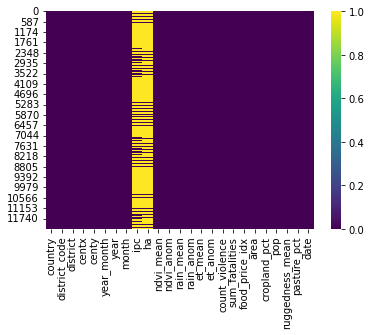

In [52]:
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()